In [1]:
dat<-read.csv('bike.csv',header = TRUE)
install.packages('corrplot')
install.packages('glmnet')

Installing package into ‘/home/lian6/R/x86_64-pc-linux-gnu-library/3.1’
(as ‘lib’ is unspecified)
Installing package into ‘/home/lian6/R/x86_64-pc-linux-gnu-library/3.1’
(as ‘lib’ is unspecified)


corrplot 0.84 loaded


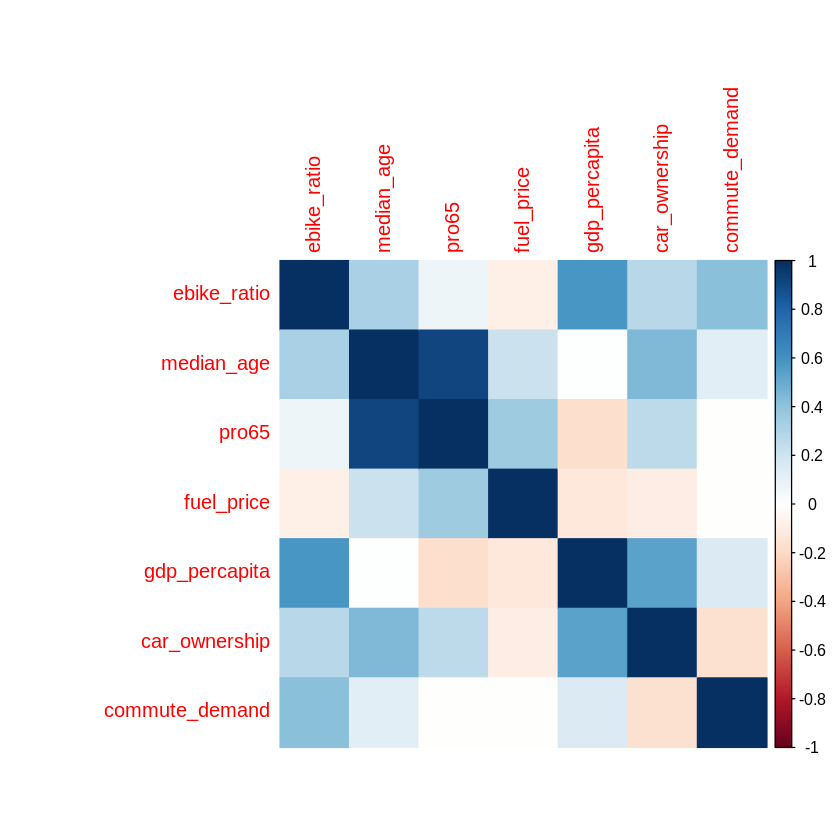

In [2]:
#corrlation heatmap
xm<-dat[,-1]
library(corrplot)
corrplot(cor(xm),method = "color")

In [3]:
#stepwise
library(MASS)
null<-lm(ebike_ratio~1,data = xm)
full<-lm(ebike_ratio~.,data = xm)
set.seed(123)
st <- stepAIC(null, scope=list(lower=null, upper=full), trace=FALSE)
coef(st)


(Intercept) gdp_percapita    median_age         pro65 car_ownership 
-8.638524e+01  2.300161e-04  3.229845e+00 -2.039922e+00 -3.006862e-02

In [4]:
#related variable:  gdp_percapita, median_age, pro65, car_ownership 

In [5]:
#Lasso
library(glmnet)
x<-as.matrix(xm[,-1])
y<-as.vector(xm[,1])
set.seed(1234)
tmp_las<-cv.glmnet(x=x,y=y,nfolds = 5,alpha=1,family='gaussian',intercept=TRUE)
coef(tmp_las, s=tmp_las$lambda.min)



Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13



7 x 1 sparse Matrix of class "dgCMatrix"
                           1
(Intercept)    -1.209079e+01
median_age      2.717409e-01
pro65           .           
fuel_price      .           
gdp_percapita   1.329133e-04
car_ownership   .           
commute_demand  4.798996e-02

In [6]:
# just forcomparision, can see that gdp_percapita, median_age is very likely to be relative.
# Now we start vairable coparsion

In [7]:
lm1<-lm(ebike_ratio~gdp_percapita+median_age,data = xm)
summary(lm1)


Call:
lm(formula = ebike_ratio ~ gdp_percapita + median_age, data = xm)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2484 -2.7932  0.1649  0.9018 10.8498 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)   -3.457e+01  1.754e+01  -1.971  0.06524 . 
gdp_percapita  2.102e-04  6.473e-05   3.248  0.00474 **
median_age     7.656e-01  4.230e-01   1.810  0.08804 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.958 on 17 degrees of freedom
Multiple R-squared:  0.4486,	Adjusted R-squared:  0.3837 
F-statistic: 6.916 on 2 and 17 DF,  p-value: 0.006345


In [8]:
lm2<-lm(ebike_ratio~gdp_percapita+median_age+car_ownership ,data = xm)
summary(lm2)


Call:
lm(formula = ebike_ratio ~ gdp_percapita + median_age + car_ownership, 
    data = xm)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8927 -2.6724 -0.4639  0.8831  9.6436 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)   -3.883e+01  1.737e+01  -2.235  0.04003 * 
gdp_percapita  2.740e-04  7.828e-05   3.501  0.00296 **
median_age     1.111e+00  4.826e-01   2.302  0.03511 * 
car_ownership -2.450e-02  1.779e-02  -1.377  0.18748   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.857 on 16 degrees of freedom
Multiple R-squared:  0.507,	Adjusted R-squared:  0.4146 
F-statistic: 5.485 on 3 and 16 DF,  p-value: 0.00872


In [9]:
lm3<-lm(ebike_ratio~gdp_percapita+median_age+pro65+car_ownership ,data = xm)
summary(lm3)



Call:
lm(formula = ebike_ratio ~ gdp_percapita + median_age + pro65 + 
    car_ownership, data = xm)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1297 -2.1181 -0.7298  1.6874  7.4218 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)   -8.639e+01  2.606e+01  -3.315  0.00471 **
gdp_percapita  2.300e-04  7.240e-05   3.177  0.00625 **
median_age     3.230e+00  1.028e+00   3.141  0.00673 **
pro65         -2.040e+00  8.992e-01  -2.269  0.03849 * 
car_ownership -3.007e-02  1.605e-02  -1.874  0.08057 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.438 on 15 degrees of freedom
Multiple R-squared:  0.633,	Adjusted R-squared:  0.5351 
F-statistic: 6.467 on 4 and 15 DF,  p-value: 0.003125


In [10]:
lm4<-lm(ebike_ratio~gdp_percapita+median_age+commute_demand ,data = xm)
summary(lm4)



Call:
lm(formula = ebike_ratio ~ gdp_percapita + median_age + commute_demand, 
    data = xm)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5703 -2.0899  0.2199  1.4521  7.3505 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)    -3.177e+01  1.674e+01  -1.898  0.07590 . 
gdp_percapita   1.937e-04  6.224e-05   3.112  0.00671 **
median_age      6.796e-01  4.049e-01   1.678  0.11267   
commute_demand  9.355e-02  5.536e-02   1.690  0.11046   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.758 on 16 degrees of freedom
Multiple R-squared:  0.5321,	Adjusted R-squared:  0.4444 
F-statistic: 6.065 on 3 and 16 DF,  p-value: 0.005856


In [11]:

lm5<-lm(ebike_ratio~gdp_percapita+median_age+commute_demand+car_ownership ,data = xm)
summary(lm5)


Call:
lm(formula = ebike_ratio ~ gdp_percapita + median_age + commute_demand + 
    car_ownership, data = xm)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8551 -2.2429  0.1826  1.5259  7.3703 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)    -3.493e+01  1.746e+01  -2.000   0.0640 .
gdp_percapita   2.356e-04  8.378e-05   2.812   0.0131 *
median_age      9.057e-01  5.068e-01   1.787   0.0941 .
commute_demand  7.362e-02  6.193e-02   1.189   0.2530  
car_ownership  -1.474e-02  1.939e-02  -0.760   0.4589  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.808 on 15 degrees of freedom
Multiple R-squared:  0.5495,	Adjusted R-squared:  0.4293 
F-statistic: 4.574 on 4 and 15 DF,  p-value: 0.01295


In [ ]:
# The conclusiong is that gdp_percapita, median_age are relative, while car_ownership maybe relative